Starting ISS tracking for 100 points...


/var/folders/f6/jtk3r69n0_1b6djsj6snbv2w0000gn/T/ipykernel_1624/968329142.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time_utc = datetime.utcfromtimestamp(data["timestamp"]).strftime('%Y-%m-%d %H:%M:%S')


1/100 → Lat: 51.55, Lon: 150.96, Time: 2025-07-05 15:38:20
2/100 → Lat: 51.51, Lon: 152.05, Time: 2025-07-05 15:38:31
3/100 → Lat: 51.45, Lon: 153.15, Time: 2025-07-05 15:38:42
4/100 → Lat: 51.38, Lon: 154.34, Time: 2025-07-05 15:38:54
5/100 → Lat: 51.30, Lon: 155.43, Time: 2025-07-05 15:39:05
6/100 → Lat: 51.19, Lon: 156.81, Time: 2025-07-05 15:39:19
7/100 → Lat: 51.09, Lon: 157.89, Time: 2025-07-05 15:39:30
8/100 → Lat: 50.97, Lon: 158.96, Time: 2025-07-05 15:39:41
9/100 → Lat: 50.84, Lon: 160.12, Time: 2025-07-05 15:39:53
10/100 → Lat: 50.66, Lon: 161.47, Time: 2025-07-05 15:40:07
11/100 → Lat: 50.52, Lon: 162.52, Time: 2025-07-05 15:40:18
12/100 → Lat: 50.30, Lon: 163.95, Time: 2025-07-05 15:40:33
13/100 → Lat: 50.13, Lon: 164.98, Time: 2025-07-05 15:40:44
14/100 → Lat: 49.93, Lon: 166.10, Time: 2025-07-05 15:40:56
15/100 → Lat: 49.72, Lon: 167.21, Time: 2025-07-05 15:41:08
16/100 → Lat: 49.51, Lon: 168.22, Time: 2025-07-05 15:41:19
17/100 → Lat: 49.28, Lon: 169.31, Time: 2025-07-0

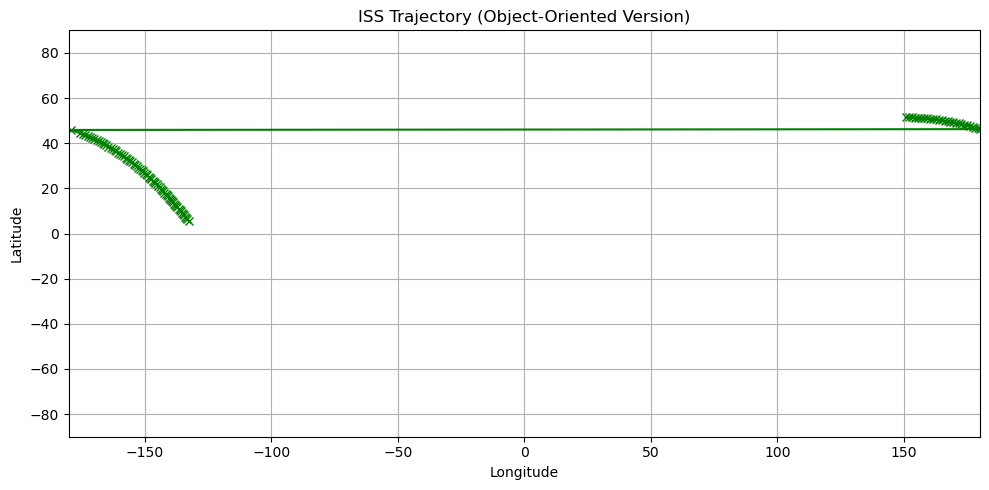

In [1]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

class ISSTracker:
    def __init__(self, count=100, delay=10):
        self.count = count
        self.delay = delay
        self.latitudes = []
        self.longitudes = []
        self.timestamps = []

    def fetch_position(self):
        try:
            response = requests.get("http://api.open-notify.org/iss-now.json")
            data = response.json()
            if response.status_code == 200 and data["message"] == "success":
                lat = float(data["iss_position"]["latitude"])
                lon = float(data["iss_position"]["longitude"])
                time_utc = datetime.utcfromtimestamp(data["timestamp"]).strftime('%Y-%m-%d %H:%M:%S')
                return lat, lon, time_utc
        except Exception as e:
            print(f"Error: {e}")
        return None, None, None

    def collect_data(self):
        print(f"Starting ISS tracking for {self.count} points...")
        for i in range(self.count):
            lat, lon, ts = self.fetch_position()
            if lat is not None:
                self.latitudes.append(lat)
                self.longitudes.append(lon)
                self.timestamps.append(ts)
                print(f"{i+1}/{self.count} → Lat: {lat:.2f}, Lon: {lon:.2f}, Time: {ts}")
            else:
                print(f"{i+1}/{self.count} → Failed to fetch data.")
            time.sleep(self.delay)

    def plot_path(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.longitudes, self.latitudes, marker='x', linestyle='-', color='green')
        plt.title("ISS Trajectory (Object-Oriented Version)")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.xlim(-180, 180)
        plt.ylim(-90, 90)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    tracker = ISSTracker()
    tracker.collect_data()
    tracker.plot_path()
